<a href="https://colab.research.google.com/github/Nihal-18/The-Sparks-Foundation-Internship/blob/main/Solution_2_KMeams_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

NIHAL M TODANKAR


THE SPARKS FOUNDATION

GRIPFEB21

TASK #2 PREDICTION USING UNSUPERVISED LEARNING MODEL

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn import datasets

In [15]:
ir= datasets.load_iris()

In [16]:
df= pd.DataFrame(data= ir.data, columns= ir.feature_names )

In [17]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [18]:
df.shape

(150, 4)

In [19]:
l1= []
for i in range(df.shape[0]):
  l1.append(i)

In [21]:
# New Dataset
DF= df


In [22]:
# New column ID in old dataset

df['ID']= l1

df.shape

print(df.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  ID
0                5.1               3.5                1.4               0.2   0
1                4.9               3.0                1.4               0.2   1
2                4.7               3.2                1.3               0.2   2
3                4.6               3.1                1.5               0.2   3
4                5.0               3.6                1.4               0.2   4


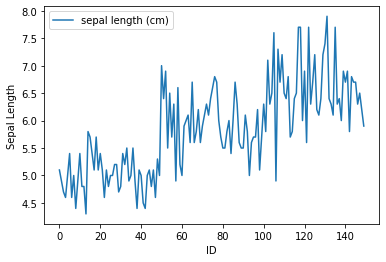

In [24]:
df.plot(x= 'ID', y= 'sepal length (cm)')
plt.xlabel('ID')
plt.ylabel('Sepal Length')
plt.show()

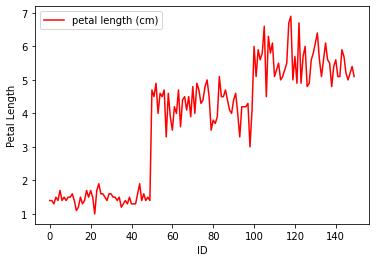

In [27]:
df.plot(x= 'ID', y= 'petal length (cm)', color= 'Red')
plt.xlabel('ID')
plt.ylabel('Petal Length')
plt.show()

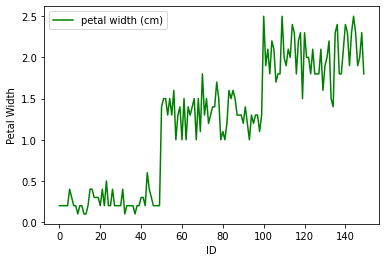

In [29]:
df.plot(x= 'ID', y= 'petal width (cm)', color= 'Green')
plt.xlabel('ID')
plt.ylabel('Petal Width')
plt.show()

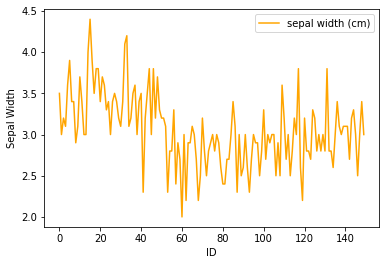

In [31]:
df.plot(x= 'ID', y= 'sepal width (cm)', color= 'Orange')
plt.xlabel('ID')
plt.ylabel('Sepal Width')
plt.show()

Finding the optimum number of clusters for k-means classification


In [33]:
x = DF.iloc[:, [0, 1, 2, 3]].values

from sklearn.cluster import KMeans
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

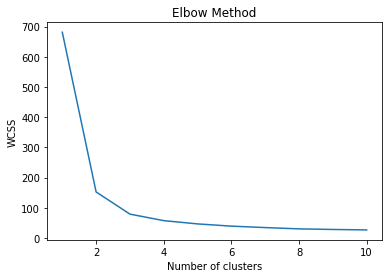

In [34]:
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') # Within cluster sum of squares
plt.show()

Applying kmeans to the dataset / Creating the kmeans classifier


In [35]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)

y_kmeans = kmeans.fit_predict(x)

Visualising the clusters - On the first two columns


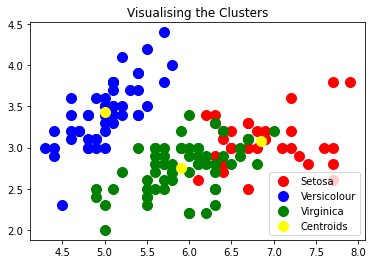

In [38]:
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Setosa')

plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Versicolour')

plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'yellow', label = 'Centroids')

plt.legend()

plt.title('Visualising the Clusters')

plt.show();